plot the likelihood function for slices of the parameter values

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import mmread
import mpmath as mp
from scipy.optimize import minimize
import time
%matplotlib inline

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [8]:
def negloglik(param, mat):
    alpha = param[0]
    c = param[1]
    sigma = param[2]
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (mp.gamma(1 + c) * mp.gamma(i - 1 + c + sigma)) / (mp.gamma(i + c) * mp.gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * sum(exponent_vec)) + sum(prod_vec) + K* np.log(alpha)
    return(np.real(-loglikelihood))

In [4]:
cons = ({'type': 'ineq', 'fun': lambda x: x[1] + x[2]})

In [3]:
name = 'alt.atheism'

In [37]:
newsgroups_train = fetch_20newsgroups(subset='train', categories=[name])
vectors = vectorizer.fit_transform(newsgroups_train.data)
test_mat = vectors
test_mat.data = np.ones(test_mat.data.size)

In [35]:
newsgroups_train.filenames.size

480

alpha change for alt.atheism documents

In [33]:
like_vec = []
alpha_vec = np.arange(120,260)
for alpha in alpha_vec:
    param = [alpha, 4, 0.5]
    value = negloglik(param,test_mat)
    like_vec.append(value)

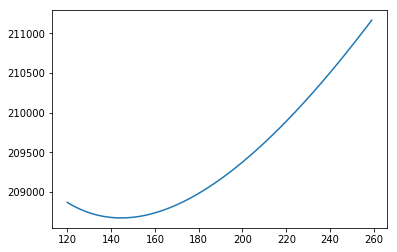

In [34]:
plt.plot(alpha_vec,like_vec)

c change for atheism docs

In [24]:
like_vec = []
c_vec = np.arange(3,5,0.05)
for c in c_vec:
    param = [130, c, 0.5]
    value = negloglik(param,test_mat)
    like_vec.append(value)

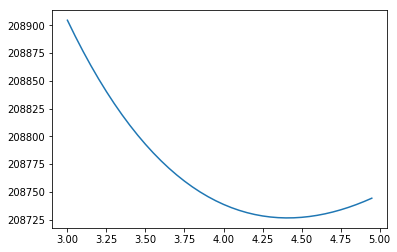

In [25]:
plt.plot(c_vec,like_vec)

sigma change for atheism

In [31]:
like_vec = []
sig_vec = np.arange(0.3,0.7
                    ,0.01)
for sig in sig_vec:
    param = [130, 5, sig]
    value = negloglik(param,test_mat)
    like_vec.append(value)

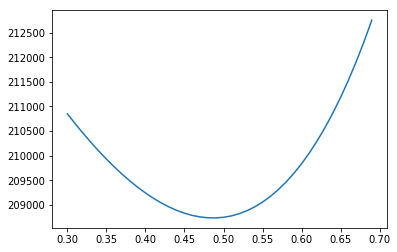

In [32]:
plt.plot(sig_vec,like_vec)

In [41]:
nips_mat = mmread("../data/nipspapersmatrix.mtx")
nips_mat.data = np.ones(nips_mat.data.size) # change all non-zero values to 1

sigma change for neurips

In [50]:
like_vec = []
sig_vec = np.arange(0.6,0.95
                    ,0.01)
for sig in sig_vec:
    param = [130, 5, sig]
    value = negloglik(param,neurips_mat)
    like_vec.append(value)

In [44]:
col_sums= np.asarray(nips_mat.sum(axis=0)).flatten().astype(int)

In [46]:
sum(col_sums==1)/col_sums.size

0.7164995837111915

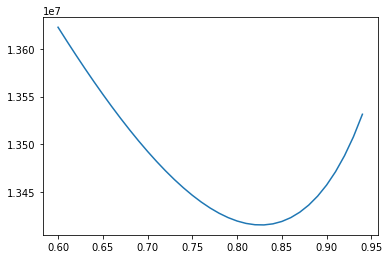

In [51]:
plt.plot(sig_vec,like_vec)

alpha change for neurips

In [202]:
like_vec = []
alpha_vec = np.arange(100,400,10)
for alpha in alpha_vec:
    param = [alpha, 4, 0.7]
    value = negloglik(param,nips_mat)
    like_vec.append(value)

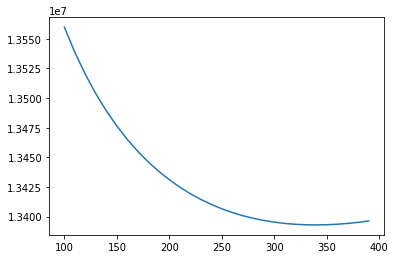

In [203]:
plt.plot(alpha_vec,like_vec)

c change for nips

In [183]:
like_vec = []
c_vec = np.arange(7,10,0.05)
for c in c_vec:
    param = [260, c, 0.7]
    value = negloglik(param,nips_mat)
    like_vec.append(value)

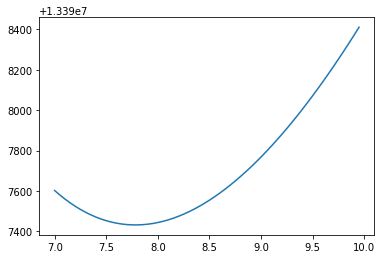

In [184]:
plt.plot(c_vec,like_vec)

In [53]:
sum(nips_mat.data)/5806

899.669135377196

In [182]:
def negloglik(param, mat):
    alpha = param[0]
    c = param[1]
    sigma = param[2]
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (mp.gamma(1 + c) * mp.gamma(i - 1 + c + sigma)) / (mp.gamma(i + c) * mp.gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * sum(exponent_vec)) + sum(prod_vec) + K* np.log(alpha)

    return(np.real(-loglikelihood))

In [139]:
def negloglik_alpha(alpha,param, mat):
    c = param[0]
    sigma = param[1]
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (mp.gamma(1 + c) * mp.gamma(i - 1 + c + sigma)) / (mp.gamma(i + c) * mp.gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    np_exp = np.dtype('float32').type(sum(exponent_vec))
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * np_exp) + sum(prod_vec) + K* np.log(alpha)
    return(np.real(-loglikelihood)-200000)

In [198]:
def negloglik_c(c,param, mat):
    alpha = param[0]
    sigma = param[1]
    np_gamma=np.frompyfunc(mp.gamma,1,1)
    c=np.dtype('float32').type(c)
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (np_gamma(1 + c) * np_gamma(i - 1 + c + sigma)) / (np_gamma(i + c) * np_gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    np_exp = np.dtype('float32').type(sum(exponent_vec))
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * np_exp) + sum(prod_vec) + K* np.log(alpha)
    
    return(float(np.real(-loglikelihood)-200000-13203046-6000))

In [209]:
def negloglik_sig(sigma,param, mat):
    alpha = param[0]
    c = param[1]
    np_gamma=np.frompyfunc(mp.gamma,1,1)
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (np_gamma(1 + c) * np_gamma(i - 1 + c + sigma)) / (np_gamma(i + c) * np_gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    np_exp = np.dtype('float32').type(sum(exponent_vec))
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * np_exp) + sum(prod_vec) + K* np.log(alpha)
    
    return(np.real(-loglikelihood)-200000)

In [210]:
result_min = minimize(negloglik_sig, x0=0.7, 
                           args=(np.array([260,4]),nips_mat), options={'disp':True})

         Current function value: 13194798.763832
         Iterations: 2
         Function evaluations: 225
         Gradient evaluations: 71


In [211]:
result_min.x

array([0.73569999])

In [186]:
result_min.x

array([7.])

In [149]:
yo=np.frompyfunc(mp.gamma,2,1)

In [108]:
result_min

      fun: 13203046.489476722
 hess_inv: array([[0.10972855]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([187.70144965])

In [107]:
result_min.fun

13203046.489476722

In [109]:
abs(-1)

1

# writing my own optimizer for neurips dataset

In [111]:
def ibp_coordinate_optimizer(mat,initial, tol):
    bar = tol+1
    alpha = initial[0]
    c = initial[1]
    sigma = initial[2]
    iter=1
    new_value = 0
    counter=0
    while(bar>tol and counter<10):
        # coordinate ascent
        print(iter)
        result_alpha = minimize(negloglik_alpha, x0 = alpha, args=([c,sigma], mat))
        alpha = float(result_alpha.x)
        result_c = minimize(negloglik_c, x0 = c, args = ([alpha, sigma], mat))
        c = float(result_c.x)
        result_sigma = minimize(negloglik_sig, x0 = sigma, args=([alpha, c], mat))
        sigma = float(result_sigma.x)
        iter +=1
        initial = new_value
        new_value = result_sigma.fun
        bar = abs(initial - new_value)
        if bar<tol:
            counter +=1
        else:
            counter =0
        
    return([alpha,x,sigma,new_value])
        

In [112]:
result = ibp_coordinate_optimizer(nips_mat, [200,4,0.8],tol=100)

1


TypeError: cannot create mpf from array([5.])